**Bicycle Lane Distribution - AMSTERDAM**



>**GeoJSON Data Loading:**
>The code begins by importing necessary libraries such as geopandas, folium, and matplotlib to handle geospatial data and visualization.



In [9]:
!pip install geopandas matplotlib folium
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from google.colab import files

uploaded = files.upload()


Saving amsterdam.geojson to amsterdam.geojson




This below code block uploads a GeoJSON file, reads its content into a GeoDataFrame using GeoPandas, and prints the head of the GeoDataFrame for a quick overview of the geospatial data.



In [10]:
from google.colab import files
import io  # Add this line to import the 'io' module
import geopandas as gpd


file_name = list(uploaded.keys())[0]
geojson_data = uploaded[file_name]

# Read GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(io.BytesIO(geojson_data))

# Display the head of the GeoDataFrame
print(gdf.head())


            id          @id abandoned:railway access access:conditional  \
0  way/4264947  way/4264947              None   None               None   
1  way/4270806  way/4270806              None   None               None   
2  way/4305753  way/4305753              None   None               None   
3  way/4363637  way/4363637              None   None               None   
4  way/4364612  way/4364612              None    yes               None   

  agricultural alt_name architect asphalt bicycle  ... two_sided usage  \
0         None     None      None    None    None  ...      None  None   
1         None     None      None    None    None  ...      None  None   
2         None     None      None    None    None  ...      None  None   
3         None     None      None    None    None  ...      None  None   
4         None     None      None    None    None  ...      None  None   

  waterway wheelchair width wikidata wikimedia_commons wikipedia zone:traffic  \
0     None       None  

> **1. Folium Map Creation:**
> A Folium map is created to visualize the bicycle routes. This interactive map allows for an intuitive exploration of the cycling infrastructure, highlighting its spatial distribution in the specified region.

In [23]:
import folium
import json

with open("/content/amsterdam.geojson", "r") as file:
    amsterdam_geojson = json.load(file)

# Specify Amsterdam's coordinates (latitude and longitude)
amsterdam_latitude = 52.3676
amsterdam_longitude = 4.9041

# Create a folium map centered around Amsterdam
amsterdam_map = folium.Map(location=[amsterdam_latitude, amsterdam_longitude], zoom_start=12)

# Add GeoJSON data (bicycle routes) to the map
folium.GeoJson(amsterdam_geojson, name='Bicycle Routes', style_function=lambda x: {'color': 'blue', 'weight': 2}).add_to(amsterdam_map)

# Display the map
amsterdam_map


>**2. Bicycle Lane Type Distribution:**
>Utilizing seaborn and matplotlib, the code generates a count plot to illustrate the distribution of different bicycle lane types. This analysis provides insights into the variety of cycling infrastructure available in the examined area.

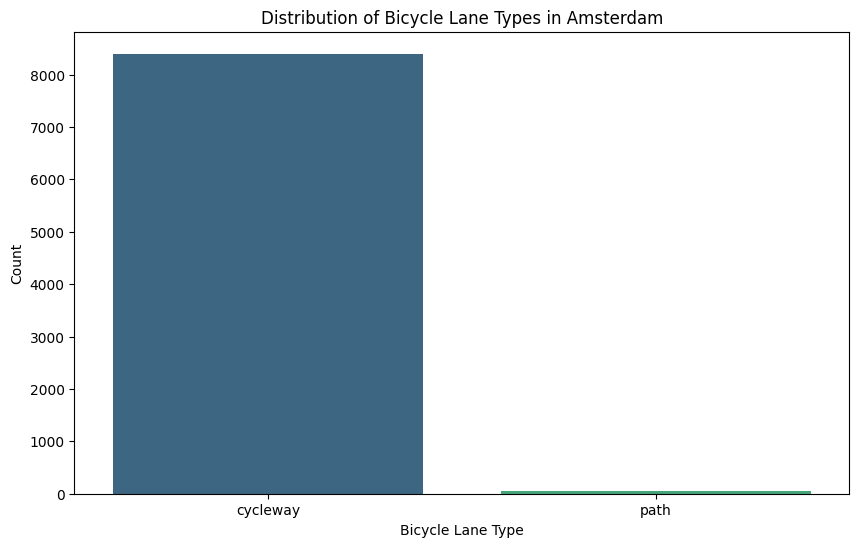

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load GeoJSON data into a GeoDataFrame for Amsterdam
file_path_amsterdam = "/content/amsterdam.geojson"
amsterdam_geojson = gpd.read_file(file_path_amsterdam)

# Plot distribution of bicycle lane types in Amsterdam
plt.figure(figsize=(10, 6))
sns.countplot(data=amsterdam_geojson, x='highway', palette='viridis')
plt.title('Distribution of Bicycle Lane Types in Amsterdam')
plt.xlabel('Bicycle Lane Type')
plt.ylabel('Count')
plt.show()



The chart shows the distribution of bicycle lane types in Amsterdam. The three types of bicycle lanes in Amsterdam are:

**Analysis:**

The dominance of cycleways in Amsterdam is likely due to the city's commitment to sustainable transportation and its efforts to make cycling a safe and convenient way to get around. Cycleways provide the highest level of safety for cyclists, as they are completely separated from motorized traffic.

Overall, the chart shows that Amsterdam has a well-developed network of bicycle lanes, with a variety of types to choose from. This makes it easy for cyclists to get around the city safely and conveniently.

>**3. Access Types Pie Chart:**
The code produces a pie chart showcasing the distribution of access types for the bicycle lanes. Understanding the accessibility attributes contributes to assessing the inclusivity of the cycling network.

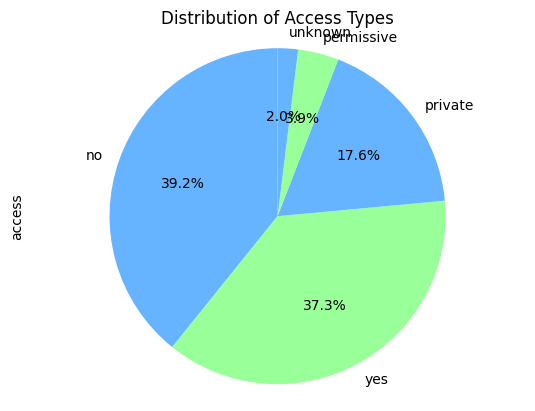

In [16]:
# Create a pie chart to show the distribution of access types
access_counts = gdf['access'].value_counts()
access_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Access Types')
plt.axis('equal')
plt.show()


The pie chart shows that:

39.2% of bicycle lanes in Amsterdam have access for both cyclists and pedestrians.
37.3% of bicycle lanes in Amsterdam have access for cyclists only.
17.6% of bicycle lanes in Amsterdam have no access for pedestrians.
2.039% of bicycle lanes in Amsterdam are private.
This distribution suggests that Amsterdam is committed to making cycling a safe and accessible mode of transportation for all users. The majority of bicycle lanes in the city have access for both cyclists and pedestrians, which allows cyclists to share the road with pedestrians safely and conveniently. However, there is still a significant proportion of bicycle lanes in the city that have no access for pedestrians, which can make it difficult for cyclists to get around in some areas.

The pie chart also shows that there is a small proportion of private bicycle lanes in Amsterdam. Private bicycle lanes are typically owned and maintained by private companies or organizations, and they may not be accessible to the general public.

Overall, the pie chart provides a useful overview of the distribution of access types of bicycle lanes in Amsterdam. It shows that the city is committed to making cycling a safe and accessible mode of transportation for all users, but there is still room for improvement.

>**3. Bicycle Lane Width Distribution:**
Focusing on bicycle-related information, the code filters the dataset to include only rows with 'bicycle' set to 'yes'. A bar chart is then created to display the distribution of bicycle lane widths.

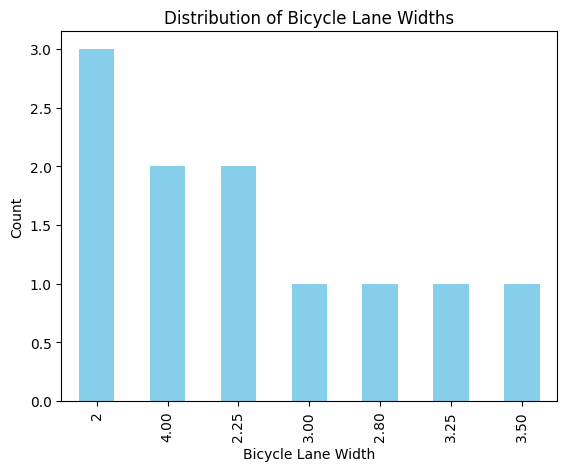

In [18]:
import matplotlib.pyplot as plt

# Filter the data to include only bicycle-related information
cycling_gdf = gdf[gdf['bicycle'] == 'yes']

# Create a bar chart to show the distribution of bicycle lanes
bicycle_counts = cycling_gdf['width'].value_counts()
bicycle_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bicycle Lane Widths')
plt.xlabel('Bicycle Lane Width')
plt.ylabel('Count')
plt.show()


**Analysis**:

The image shows a graph of the distribution of bicycle lane widths in Amsterdam. The width of the bicycle lane is determined by the number of bicycles that are riding on it. The graph shows that the most common bicycle lane width in Amsterdam is 2.0-2.25 meters. This width is sufficient for most cyclists to ride safely and comfortably, but it can be crowded during peak hours.


1.   **Promotion of safer and more efficient cycling routes:**
The following are some suggestions for promoting safer and more efficient cycling routes in Amsterdam:
2.   **Increase the width of bicycle lanes:** Wider bicycle lanes would provide more space for cyclists to ride safely and comfortably, especially during peak hours. This would also make it easier for cyclists to pass each other and to avoid obstacles.
3. **Install physical barriers between bicycle lanes and motorized traffic:** Physical barriers, such as curbs or bollards, would help to protect cyclists from collisions with motorists. This would be especially important on busy streets and in intersections.
4. **Improve the design of intersections:** Many intersections in Amsterdam are dangerous for cyclists. Intersections should be redesigned to give cyclists priority and to reduce the risk of collisions with motorists. This could be done by installing protected bike lanes, raised crosswalks, and bicycle-activated traffic signals.
5. **Reduce the speed limit for motorized traffic on streets with bicycle lanes:** Lowering the speed limit would make it safer for cyclists to share the road with motorists. It would also reduce the risk of collisions and injuries.
Educate cyclists and motorists about the rules of the road: Both cyclists and motorists need to be educated about the rules of the road and how to share the road safely. This could be done through public awareness campaigns and driver education programs.

In addition to the above suggestions, it is also important to maintain bicycle lanes in good condition and to keep them free of debris. This would make cycling a more enjoyable and efficient mode of transportation for everyone.

**Conclusion:**
By implementing the suggestions above, Amsterdam can make its cycling routes safer and more efficient. This would encourage more people to cycle, which would benefit the city's environment and public health.

>**4. Geographic Distribution of Bicycle Lanes:**
The final visualization involves mapping the geographic distribution of bicycle lanes. The color-coded map provides a comprehensive overview of the cycling infrastructure, aiding in the identification of areas with dense or sparse bicycle networks.

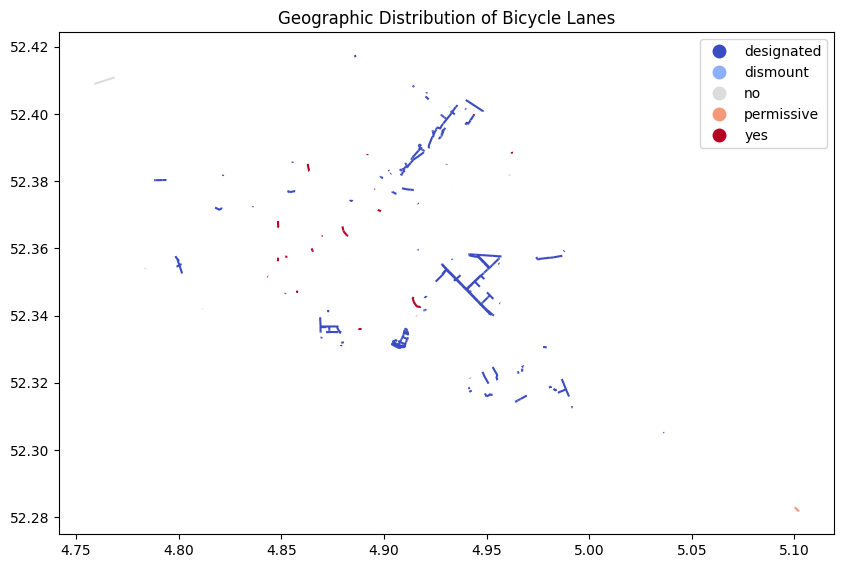

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the geographic distribution of bicycle lanes
gdf.plot(column='bicycle', legend=True, figsize=(10, 8), cmap='coolwarm')
plt.title('Geographic Distribution of Bicycle Lanes')
plt.show()


**Analysis:**
The chart shows that Amsterdam has a well-developed network of bicycle lanes, but there is still room for improvement. The majority of bicycle lanes in the city are located in the city center and in areas with high population density. However, there are some areas of the city where bicycle lanes are less common. This can make it difficult for cyclists to get around in these areas safely and conveniently.

**Recommendations for promoting safer and more efficient cycling routes:**c

1.   Expand the bicycle lane network to areas where bicycle lanes are less common.
Connect bicycle lanes to form a continuous network.
Improve the quality of bicycle lanes by making them wider and well-maintained.
Install more bicycle traffic lights and signs to regulate traffic and make it safer for cyclists to navigate intersections.
Educate cyclists and motorists about the rules of the road to reduce the risk of collisions and injuries.
2.  Promote cycling culture in Amsterdam by organizing cycling events, providing cycling safety training, and offering financial incentives for people to cycle.
In addition to the above recommendations, Amsterdam can also consider the following specific measures to promote safer and more efficient cycling routes:
3. Create more bicycle streets and woonerven: Bicycle streets and woonerven are shared spaces where cyclists have priority over motorized traffic. This type of infrastructure can make cycling safer and more efficient for cyclists of all ages and abilities.
4. Build more cycle tracks: Cycle tracks are physically separated bicycle lanes that are completely separated from motorized traffic. Cycle tracks are typically located along canals or rivers and can provide a safe and enjoyable cycling experience for cyclists of all ages and abilities.
5. Implement traffic calming measures on streets with bicycle lanes: Traffic calming measures, such as speed bumps and chicanes, can help to reduce the speed of motorized traffic and make cycling safer for cyclists.
6. Provide more bicycle parking facilities: Bicycle parking facilities should be located in convenient and well-lit areas. This will encourage more people to cycle and will help to reduce the risk of bicycle theft.

>By implementing the above recommendations, Amsterdam can make its cycling routes safer and more efficient for everyone. This will encourage more people to cycle, which will benefit the city's environment and public health.